In [ ]:
from numpy import genfromtxt
import numpy as np
import random as rand
def predict(x,theta):
  return x.dot(theta)

def gradient(o,y,x):
  return 2*x*(o-y)

def update_weight(theta,alpha,dtheta):
  return theta - alpha*dtheta

data = genfromtxt('advertising.csv',delimiter=',')
X = data[1:,:3]
Y = data[1:,3]

#init weight
alpha = 0.000001

theta = np.array([rand.uniform(-1,1) for _ in range(4)])
print(theta)

epoch_max = 1

for epoch in range(epoch_max):
  for i in range(len(X)):
    x = list(X[i])[:]
    x.append(1)
    x = np.array(x)
    y = Y[i]

    o = predict(x,theta)  
    loss = (o-y)**2
    print(loss)

    dtheta = gradient(o,y,x)

    theta = update_weight(theta,alpha,dtheta)




In [ ]:
import tensorflow as tf

x = tf.ones((2,2))

with tf.GradientTape() as t:
  t.watch(x)
  y = tf.reduce_sum(x)
  z = tf.multiply(y,y)

dz_dx = t.gradient(z,x)
print(dz_dx)

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf

print("Ver:",tf.__version__)
print("Keras Ver:",tf.keras.__version__)

Ver: 2.11.0
Keras Ver: 2.11.0


In [ ]:
import tensorflow as tf
print("GPU available:",tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU available: True


In [ ]:
import tensorflow as tf

x = [1,2,3,4]
y = 5

sd = tf.math.squared_difference(x,y)
print(sd)

tf.Tensor([16  9  4  1], shape=(4,), dtype=int32)


In [ ]:
import tensorflow as tf

x = tf.Variable([1.0])

with tf.GradientTape() as t:
  t.watch(x)
  y = x - 5.0
  l = tf.multiply(y,y)

dl_dx = t.gradient(l,x)
print(dl_dx)

tf.Tensor([-8.], shape=(1,), dtype=float32)


In [ ]:
X = []
Y = []
with open("iris.data") as f:
  for val in f.readlines():
    l = val.strip()
    spl = l.split(",")
    if len(spl)>1:
      X.append(spl[:-1])
      Y.append(spl[-1])
print(X)
print(Y)

[['5.1', '3.5', '1.4', '0.2'], ['4.9', '3.0', '1.4', '0.2'], ['4.7', '3.2', '1.3', '0.2'], ['4.6', '3.1', '1.5', '0.2'], ['5.0', '3.6', '1.4', '0.2'], ['5.4', '3.9', '1.7', '0.4'], ['4.6', '3.4', '1.4', '0.3'], ['5.0', '3.4', '1.5', '0.2'], ['4.4', '2.9', '1.4', '0.2'], ['4.9', '3.1', '1.5', '0.1'], ['5.4', '3.7', '1.5', '0.2'], ['4.8', '3.4', '1.6', '0.2'], ['4.8', '3.0', '1.4', '0.1'], ['4.3', '3.0', '1.1', '0.1'], ['5.8', '4.0', '1.2', '0.2'], ['5.7', '4.4', '1.5', '0.4'], ['5.4', '3.9', '1.3', '0.4'], ['5.1', '3.5', '1.4', '0.3'], ['5.7', '3.8', '1.7', '0.3'], ['5.1', '3.8', '1.5', '0.3'], ['5.4', '3.4', '1.7', '0.2'], ['5.1', '3.7', '1.5', '0.4'], ['4.6', '3.6', '1.0', '0.2'], ['5.1', '3.3', '1.7', '0.5'], ['4.8', '3.4', '1.9', '0.2'], ['5.0', '3.0', '1.6', '0.2'], ['5.0', '3.4', '1.6', '0.4'], ['5.2', '3.5', '1.5', '0.2'], ['5.2', '3.4', '1.4', '0.2'], ['4.7', '3.2', '1.6', '0.2'], ['4.8', '3.1', '1.6', '0.2'], ['5.4', '3.4', '1.5', '0.4'], ['5.2', '4.1', '1.5', '0.1'], ['5.5', '

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-04-20 00:40:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   183MB/s    in 0.4s    

2023-04-20 00:40:55 (183 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing import image_dataset_from_directory

print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [ ]:
# training data
train_dataset = image_dataset_from_directory('/tmp/cats_and_dogs_filtered/train',
                                             shuffle=True,
                                             batch_size=512,
                                             image_size=(160, 160))

# validation data
validation_dataset = image_dataset_from_directory('/tmp/cats_and_dogs_filtered/validation',
                                                  shuffle=True,
                                                  batch_size=512,
                                                  image_size=(160, 160))

print(train_dataset.class_names)
print(validation_dataset.class_names)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
['cats', 'dogs']
['cats', 'dogs']


In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    # images (512,160,160,3)
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# LeNet-like
import tensorflow as tf

# model architecture
model = tf.keras.Sequential()
# input shape (28,28,1)
model.add(tf.keras.Input(shape=(160, 160, 3)))

# convolution 1
model.add(tf.keras.layers.Conv2D(6, (3,3), padding='same', activation='relu')) 
# max pooling 1
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# convolution 2
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))
# max pooling 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Flatten
model.add(tf.keras.layers.Flatten())

# fully connected
# model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23104)             0         
                                                                 
 dense (Dense)               (None, 84)                1

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],
              loss='sparse_categorical_crossentropy') 
model.fit(train_dataset,epochs=100,validation_data=validation_dataset)

Epoch 1/100
4/4 [==============================] - 19s 1s/step - loss: 34.8507 - accuracy: 0.3995 - val_loss: 60.9451 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 4s 582ms/step - loss: 50.0538 - accuracy: 0.5000 - val_loss: 10.0578 - val_accuracy: 0.5090
Epoch 3/100
4/4 [==============================] - 4s 485ms/step - loss: 20.1615 - accuracy: 0.5035 - val_loss: 17.3612 - val_accuracy: 0.5060
Epoch 4/100
4/4 [==============================] - 3s 495ms/step - loss: 8.7884 - accuracy: 0.5455 - val_loss: 7.5029 - val_accuracy: 0.5050
Epoch 5/100
4/4 [==============================] - 4s 728ms/step - loss: 8.0732 - accuracy: 0.5020 - val_loss: 5.1795 - val_accuracy: 0.5130
Epoch 6/100
4/4 [==============================] - 4s 538ms/step - loss: 2.5931 - accuracy: 0.5915 - val_loss: 3.8465 - val_accuracy: 0.5410
Epoch 7/100
4/4 [==============================] - 3s 495ms/step - loss: 3.6839 - accuracy: 0.5480 - val_loss: 3.0467 - val_accuracy: 0.5530
Epoch 8/1

KeyboardInterrupt: ignored

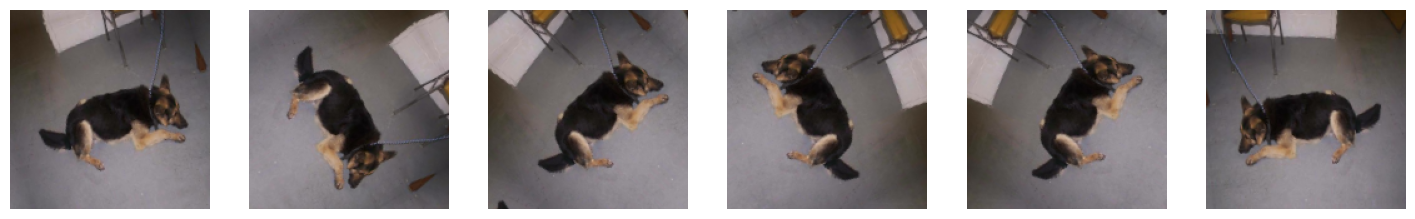

In [ ]:
# data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

# training
for images, _ in train_dataset.take(1):
    # show images
    plt.figure(figsize=(18, 15))
    for i in range(6):
        # data augmentation
        augmented_image = data_augmentation(images[0:1]/255.)
    
        ax = plt.subplot(1, 6, i+1)
        plt.imshow(augmented_image[0])
        plt.axis('off')

In [ ]:
# LeNet-like
import tensorflow as tf

# model architecture
model = data_augmentation
# input shape (28,28,1)
model.add(tf.keras.Input(shape=(160, 160, 3)))

# convolution 1
model.add(tf.keras.layers.Conv2D(6, (3,3), padding='same', activation='relu')) 
# max pooling 1
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# convolution 2
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))
# max pooling 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Flatten
model.add(tf.keras.layers.Flatten())

# fully connected
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model summary
model.summary()

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],
              loss='sparse_categorical_crossentropy') 
model.fit(train_dataset,epochs=100,validation_data=validation_dataset)

In [ ]:
import tensorflow as tf

# data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

# get VGG16
base_model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights="imagenet")

#base_model.trainable = False
for layer in base_model.layers[:-2]:
  layer.trainable = False

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalMaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(84, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

#x = tf.keras.layers.Dense(2)(x)
model = tf.keras.Model(inputs, x)

# summary
model.summary()

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],
              loss='sparse_categorical_crossentropy') 
model.fit(train_dataset,epochs=100,validation_data=validation_dataset)

Epoch 1/100
4/4 [==============================] - 12s 2s/step - loss: 66.5595 - accuracy: 0.4400 - val_loss: 27.1068 - val_accuracy: 0.6570
Epoch 2/100
4/4 [==============================] - 10s 2s/step - loss: 29.0202 - accuracy: 0.6485 - val_loss: 23.3778 - val_accuracy: 0.7540
Epoch 3/100
4/4 [==============================] - 9s 2s/step - loss: 14.4558 - accuracy: 0.7815 - val_loss: 4.4782 - val_accuracy: 0.9330
Epoch 4/100
4/4 [==============================] - 9s 2s/step - loss: 9.1184 - accuracy: 0.8305 - val_loss: 10.6632 - val_accuracy: 0.8850
Epoch 5/100
4/4 [==============================] - 10s 2s/step - loss: 6.5173 - accuracy: 0.8675 - val_loss: 3.5644 - val_accuracy: 0.9480
Epoch 6/100
4/4 [==============================] - 9s 2s/step - loss: 5.5445 - accuracy: 0.8760 - val_loss: 5.5497 - val_accuracy: 0.9160
Epoch 7/100
4/4 [==============================] - 9s 2s/step - loss: 3.8430 - accuracy: 0.9020 - val_loss: 3.1173 - val_accuracy: 0.9450
Epoch 8/100
4/4 [========